In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
population_df = pd.read_csv(r"C:\Users\ASUS\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_73852\API_SP.POP.TOTL_DS2_en_csv_v2_73852.csv", skiprows=4)
country_df = pd.read_csv(r"C:\Users\ASUS\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_73852\Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_73852.csv")

In [10]:
# Filter relevant columns: Country Name, Country Code, and 2022 population
population_2022 = population_df[['Country Name', 'Country Code', '2022']]

# Drop rows with missing population data
population_2022 = population_2022.dropna()

# Rename column for clarity
population_2022.rename(columns={'2022': 'Population'}, inplace=True)


In [12]:
# Merge with region metadata
merged_df = pd.merge(population_2022, country_df[['Country Code', 'Region']], on='Country Code')

# Drop rows with unknown region
merged_df = merged_df[merged_df['Region'].notna()]


In [13]:
region_population = merged_df.groupby('Region')['Population'].sum().reset_index()

# Sort for better visualization
region_population = region_population.sort_values(by='Population', ascending=False)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12376\1474289508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_population, x='Population', y='Region', palette='viridis')


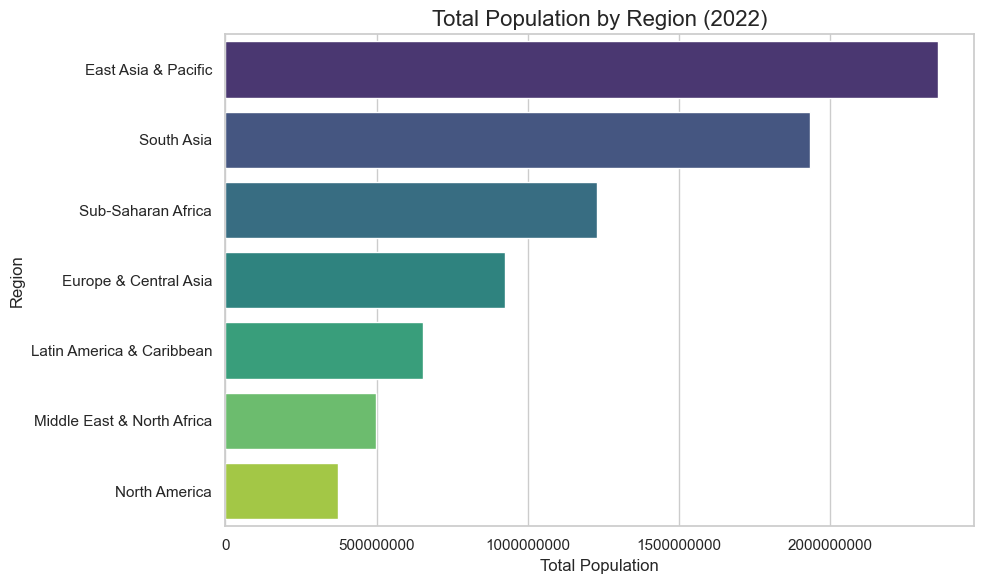

In [14]:
# Set style
sns.set(style='whitegrid')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=region_population, x='Population', y='Region', palette='viridis')

# Titles and labels
plt.title('Total Population by Region (2022)', fontsize=16)
plt.xlabel('Total Population')
plt.ylabel('Region')

# Format x-axis in billions
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


In [15]:
plt.savefig('population_by_region_2022.png')

<Figure size 640x480 with 0 Axes>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\ASUS\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_73852\API_SP.POP.TOTL_DS2_en_csv_v2_73852.csv", skiprows=4)


In [19]:
india_df = df[df['Country Name'] == 'India']

In [20]:
# Select only the year columns
india_population = india_df.loc[:, '1960':'2022'].T
india_population.columns = ['Population']
india_population.index.name = 'Year'
india_population.reset_index(inplace=True)

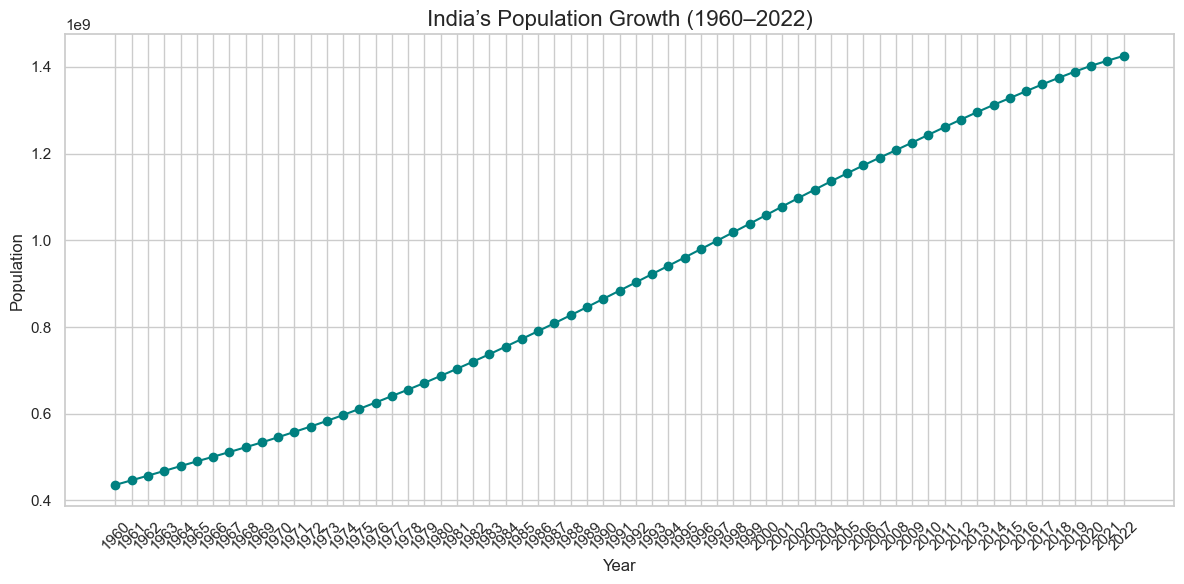

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(india_population['Year'], india_population['Population'], marker='o', color='teal')
plt.title('India’s Population Growth (1960–2022)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

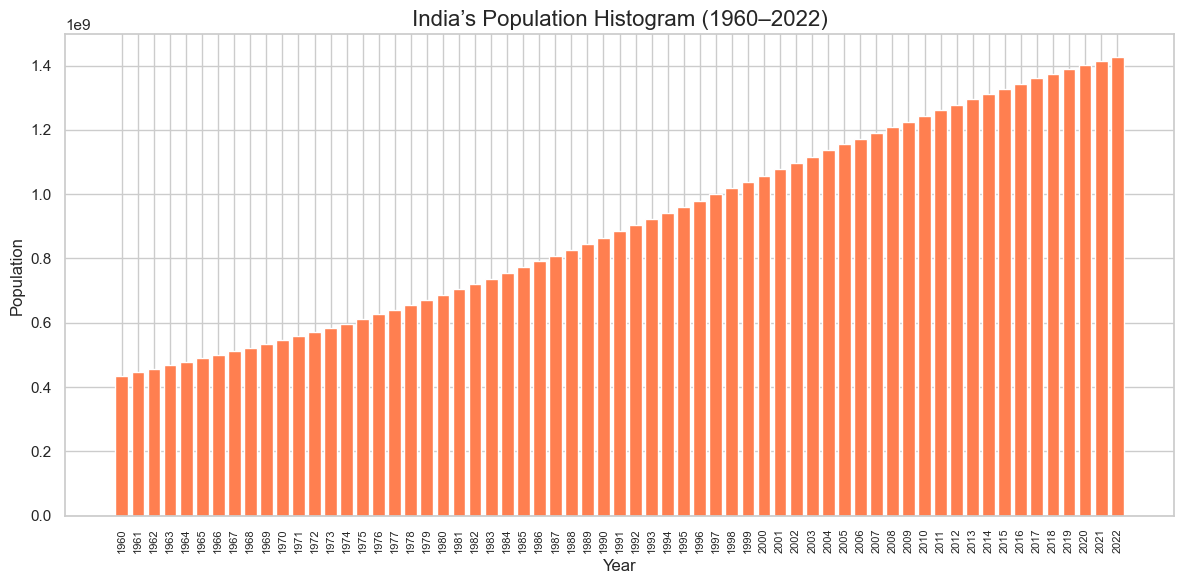

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(india_population['Year'], india_population['Population'], color='coral')
plt.title('India’s Population Histogram (1960–2022)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()


In [23]:
plt.savefig('india_population_growth.png')

<Figure size 640x480 with 0 Axes>